In [1]:
!pip install -q kaggle

In [2]:
# Loading dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:00<00:00, 1.61GB/s]
100% 163M/163M [00:00<00:00, 1.58GB/s]


In [4]:
# Unzip the file
from zipfile import ZipFile
Dataset = "/content/face-mask-dataset.zip"

with ZipFile(Dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# import necesory libraries


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image

# import masked data

In [7]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

print("with mask dataset")
print("--------------------------------------------------")
print(with_mask[:5])

print("\nwithout mask dataset")
print("--------------------------------------------------")
print(without_mask[:5])

with mask dataset
--------------------------------------------------
['with_mask_594.jpg', 'with_mask_553.jpg', 'with_mask_3167.jpg', 'with_mask_197.jpg', 'with_mask_169.jpg']

without mask dataset
--------------------------------------------------
['without_mask_3386.jpg', 'without_mask_1681.jpg', 'without_mask_46.jpg', 'without_mask_21.jpg', 'without_mask_1059.jpg']


In [8]:
print(f"total number of masked images: {len(with_mask)}")
print(f"total number of unmasked images: {len(without_mask)}")

total number of masked images: 3725
total number of unmasked images: 3828


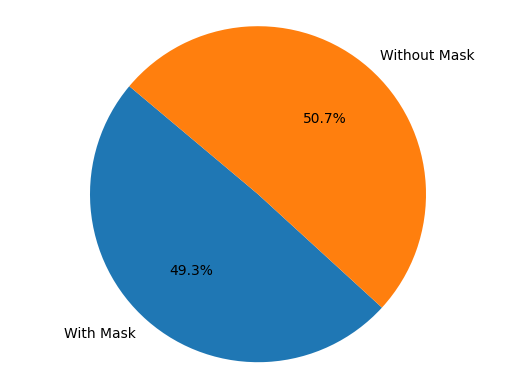

In [9]:
lables = ["With Mask" , "Without Mask"]
sizes = [len(with_mask) , len(without_mask)]

# Create piechart
plt.pie(sizes, labels=lables, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# The data is almost balanced. Now check some of the images

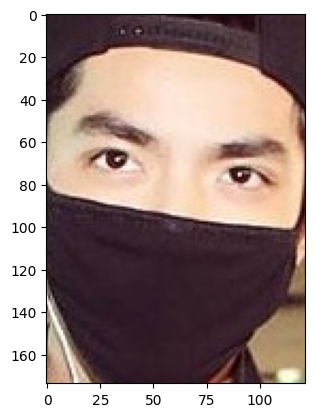

In [10]:
image = mpimg.imread('/content/data/with_mask/with_mask_999.jpg')
plt.imshow(image)
plt.show()

In [11]:
file_path = "/content/data/with_mask"
p = 0
with_mask_sample = []

for image_path in with_mask:
  if p < 10:
    full_path = os.path.join(file_path , image_path)
    with_mask_sample.append(full_path)

  else:
    break

  p += 1

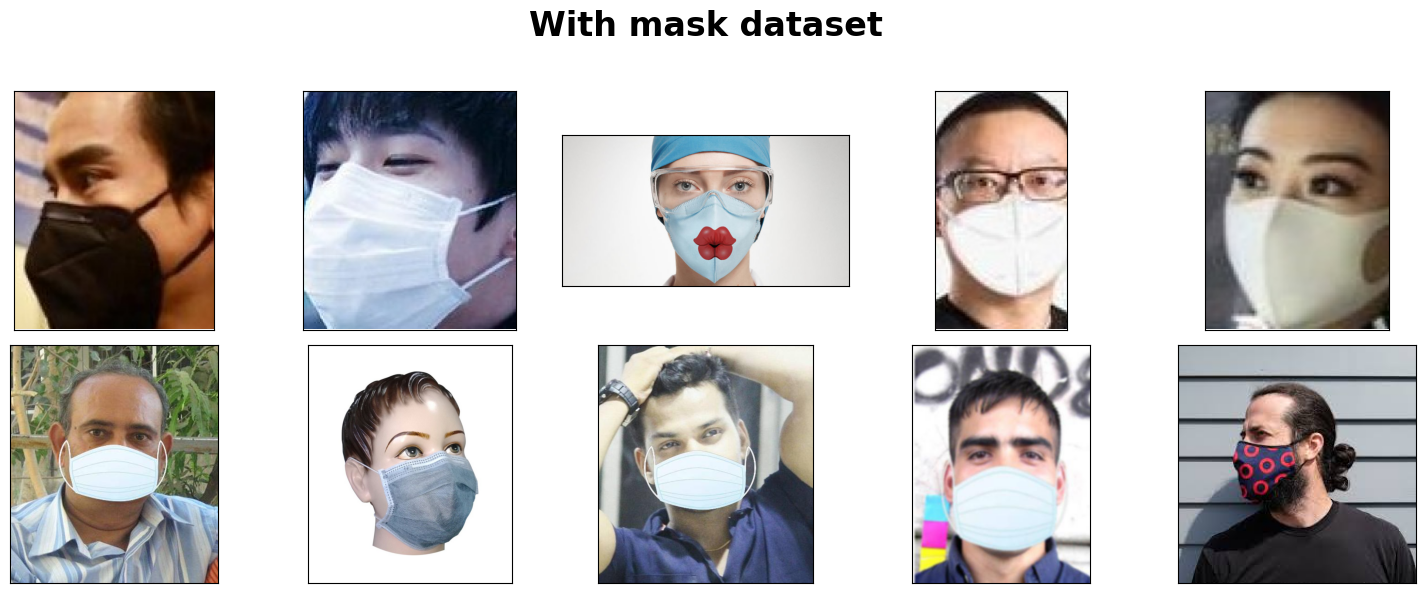

In [12]:
# Number of digits to display
n = 10

# create a figure to display an image
fig = plt.figure(figsize=(15 , 6))

# Add an h1 style heading
fig.suptitle("With mask dataset" , fontsize=24 , fontweight='bold')

# Loop through the first 'n' images, using enumerate to get indices
for index , image_path in enumerate(with_mask_sample[:n]):
   # Create a subplot within the figure
   ax = plt.subplot(2 , 10 // 2 , index + 1) # Use index+1 for subplot number

   image = mpimg.imread(image_path)
   plt.imshow(image)

   # Hide x-axis and y-axis labels and ticks
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0 , 0 , 1 , 0.95]) # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

# Now without mask

In [13]:
file_path_WithoutMask = "/content/data/without_mask"
p = 0
without_mask_sample = []

for image_path in without_mask:
  if p < 10:
    full_path = os.path.join(file_path_WithoutMask , image_path)
    without_mask_sample.append(full_path)

  else:
    break

  p += 1

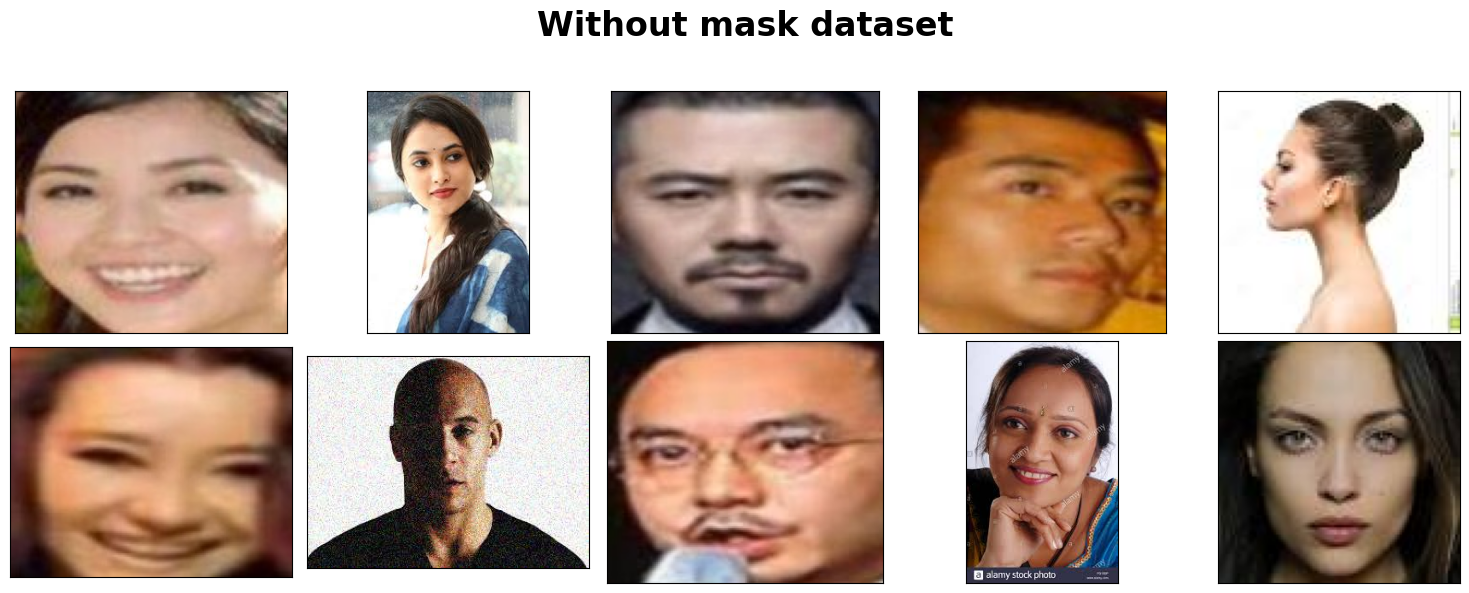

In [14]:
# Number of digits to display
n = 10

# create a figure to display an image
fig = plt.figure(figsize=(15 , 6))

# Add an h1 style heading
fig.suptitle("Without mask dataset" , fontsize=24 , fontweight='bold')

# Loop through the first 'n' images, using enumerate to get indices
for index , image_path in enumerate(without_mask_sample[:n]):
   # Create a subplot within the figure
   ax = plt.subplot(2 , 10 // 2 , index + 1) # Use index+1 for subplot number

   image = mpimg.imread(image_path)
   plt.imshow(image)

   # Hide x-axis and y-axis labels and ticks
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0 , 0 , 1 , 0.95]) # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

# Now Creating Lable for The Image

- with Mask ----> 1
- with out Mask ----> 0

In [15]:
print(f"witn mask length: {len(with_mask)}")
print(f"without mask length: {len(without_mask)}")

print(f"total length: {len(with_mask) + len(without_mask)}")

witn mask length: 3725
without mask length: 3828
total length: 7553


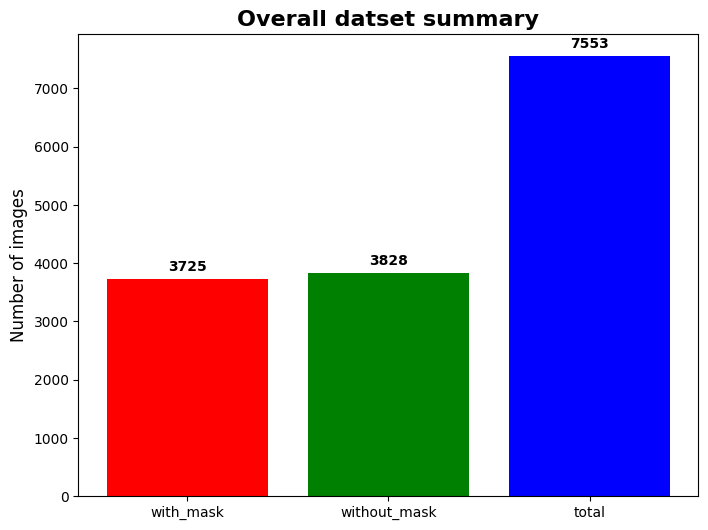

In [16]:
categories = ['with_mask' , 'without_mask' , "total"]
values = [3725 , 3828 , 7553]

# craete a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories , values , color=['red' , 'green' , 'blue'])

# Add title and labels
plt.title("Overall datset summary" , fontsize=16 , fontweight='bold')
plt.ylabel("Number of images" , fontsize=12)


# Display the values on top of the bars
for i , value in enumerate(values):
  plt.text(i , value+100, str(value) , ha='center' , va='bottom' , fontsize=10 , fontweight="bold")

# Show the chart
plt.show()

In [17]:
with_mask_label = []
with_mask_label = [1] * len(with_mask)

without_mask_label = []
without_mask_label = [0] * len(without_mask)

# Checking labels

In [18]:
with_mask_label[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [19]:
without_mask_label[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Now make full target column

In [20]:
full_target_column = with_mask_label + without_mask_label

In [21]:
full_target_column[3722:3728]

[1, 1, 1, 0, 0, 0]

# **Image Processing**

# Resize the Image

In [22]:
with_mask_path = "/content/data/with_mask/"
without_mask_path = "/content/data/without_mask/"

data = []

# process images with masks
for image_file in with_mask:
  image = Image.open(with_mask_path + image_file)
  image = image.resize((128 , 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

# process image without masks
for image_file in without_mask:
  image = Image.open(without_mask_path + image_file)
  image = image.resize((128 , 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# Now your Data are change to numpy array

array([[[218, 189, 171],
        [213, 184, 168],
        [201, 172, 158],
        ...,
        [ 23,  13,   4],
        [ 24,  14,   4],
        [ 24,  14,   4]],

       [[224, 195, 177],
        [224, 195, 179],
        [217, 188, 174],
        ...,
        [ 23,  13,   4],
        [ 24,  14,   4],
        [ 24,  14,   4]],

       [[223, 194, 176],
        [224, 195, 178],
        [218, 189, 174],
        ...,
        [ 23,  14,   5],
        [ 22,  14,   4],
        [ 22,  15,   3]],

       ...,

       [[236, 220, 168],
        [236, 220, 168],
        [236, 220, 169],
        ...,
        [154,  79,  33],
        [149,  77,  29],
        [147,  76,  28]],

       [[236, 219, 167],
        [237, 220, 168],
        [236, 220, 168],
        ...,
        [155,  81,  34],
        [151,  79,  31],
        [150,  78,  30]],

       [[236, 219, 167],
        [236, 219, 167],
        [237, 220, 168],
        ...,
        [155,  81,  34],
        [153,  81,  33],
        [152,  80,  32]]], dtype=uint8)
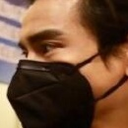

In [23]:
data[0]

In [24]:
len(data)

7553

In [25]:
len(full_target_column)

7553

# Now converting Data and Lable to Numpy arry

In [26]:
data = np.array(data)
Y = np.array(full_target_column)

In [27]:
type(data) , type(Y)

(numpy.ndarray, numpy.ndarray)

In [28]:
data.shape

(7553, 128, 128, 3)

# Apply Train Test spliting

In [29]:
X_train , X_test , y_train , y_test = train_test_split(data , Y , test_size=0.2 , random_state=42 , stratify=Y)

In [30]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6042, 128, 128, 3)
X_test shape: (1511, 128, 128, 3)
y_train shape: (6042,)
y_test shape: (1511,)


# Now scale data

In [31]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [32]:
X_train_scaled

array([[[[0.42352941, 0.61960784, 0.54901961],
         [0.41176471, 0.60392157, 0.52941176],
         [0.40392157, 0.58431373, 0.50196078],
         ...,
         [0.89411765, 0.90588235, 0.83921569],
         [0.88627451, 0.90196078, 0.83529412],
         [0.8745098 , 0.89411765, 0.83137255]],

        [[0.45882353, 0.67843137, 0.65098039],
         [0.45098039, 0.6745098 , 0.63529412],
         [0.44705882, 0.65490196, 0.61176471],
         ...,
         [0.89411765, 0.90588235, 0.83921569],
         [0.88627451, 0.90196078, 0.83529412],
         [0.8745098 , 0.89411765, 0.83137255]],

        [[0.44313725, 0.69803922, 0.71372549],
         [0.43921569, 0.69411765, 0.70588235],
         [0.44313725, 0.68627451, 0.69019608],
         ...,
         [0.89411765, 0.90588235, 0.83921569],
         [0.88627451, 0.90196078, 0.83529412],
         [0.8745098 , 0.89803922, 0.83529412]],

        ...,

        [[0.52941176, 0.76862745, 0.78823529],
         [0.54509804, 0.77647059, 0.78823529]

In [33]:
X_train_scaled[0].shape

(128, 128, 3)

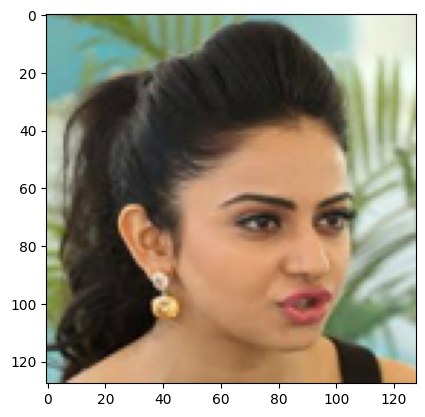

In [34]:
plt.imshow(X_train_scaled[0] , cmap='gray')

# **Now Bulding a CNN Model**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [40]:
def CNN_model():
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()
    return model

In [41]:
cnn = CNN_model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,296,066 (16.39 MB)

 Trainable params: 4,296,066 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from time import time

In [43]:
start_time = time()

history = cnn.fit(X_train_scaled , y_train , epochs=10 , validation_split=0.1)
cnn.save("CNN_model.h5")

end_time = time()

print("Total time taken: " , end_time - start_time)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.6962 - loss: 0.5876 - val_accuracy: 0.8826 - val_loss: 0.2960
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8834 - loss: 0.2882 - val_accuracy: 0.9058 - val_loss: 0.2502
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9105 - loss: 0.2513 - val_accuracy: 0.9174 - val_loss: 0.2360
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9431 - loss: 0.1546 - val_accuracy: 0.9388 - val_loss: 0.1668
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9453 - loss: 0.1567 - val_accuracy: 0.9256 - val_loss: 0.2019
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9479 - loss: 0.1565 - val_accuracy: 0.9504 - val_loss: 0.1614
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9658 - loss: 0.1076 - val_accuracy: 0.9537 - val_loss: 0.1325
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9732 - loss: 0.0824 - val_acc

Total time taken:  57.036383390426636


# **Training**

In [44]:
def plot_training_history(history):
  # Retrieve loss and accuracy values
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # Create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20 , 6))

  # Plot training and validation loss
  ax1.plot(loss, label='Training Loss' , color='blue')
  ax1.plot(val_loss, label='Validation Loss' , color='red')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()
  ax1.grid(True)

  # Plot training and validation accuracy
  ax2.plot(accuracy, label='Training Accuracy' , color='blue')
  ax2.plot(val_accuracy, label='Validation Accuracy' , color='red')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()
  ax2.grid(True)

  # Adjust layout to prevent overlap
  plt.tight_layout

  plt.show()

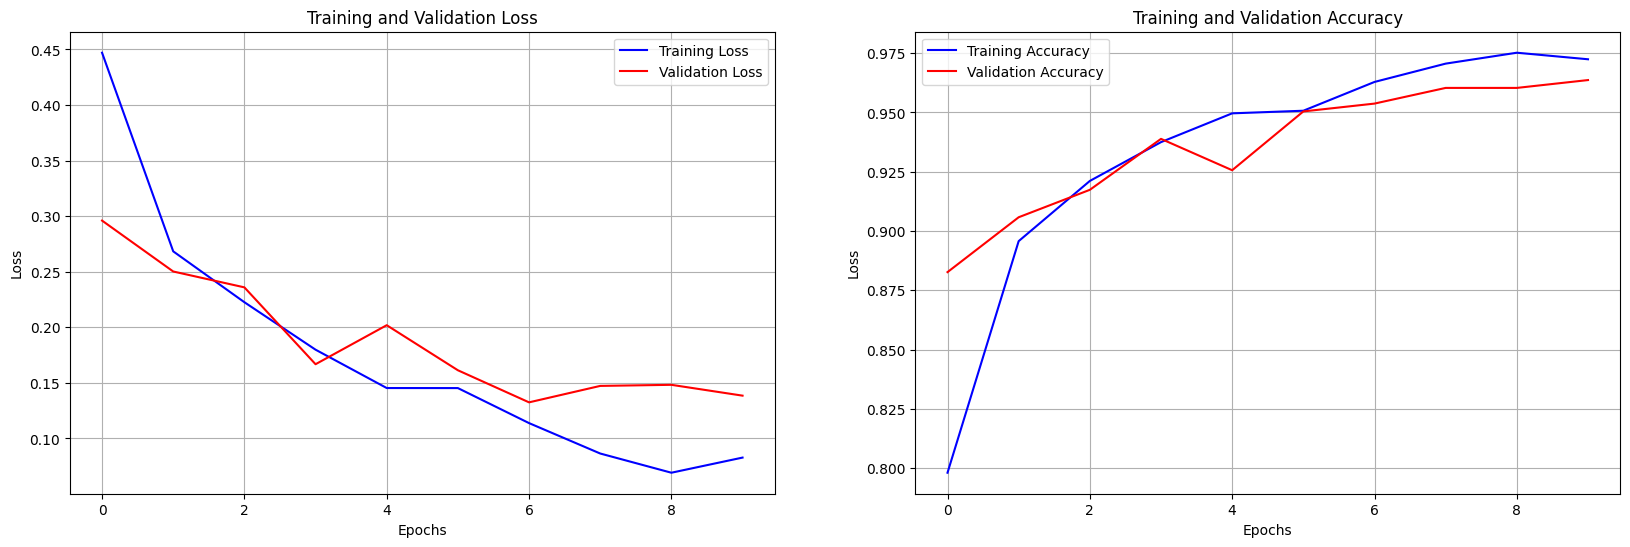

In [45]:
plot_training_history(history)

# Model evaluation

In [46]:
loss , accuracy = cnn.evaluate(X_test_scaled , y_test)

print(f"Test loss {loss:.4f}")
print(f"Test Accuracy {accuracy * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9589 - loss: 0.1658
Test loss 0.1431
Test Accuracy 96.03%


# Now predicting from the model

Enter the image path: /content/data/with_mask/with_mask_1105.jpg


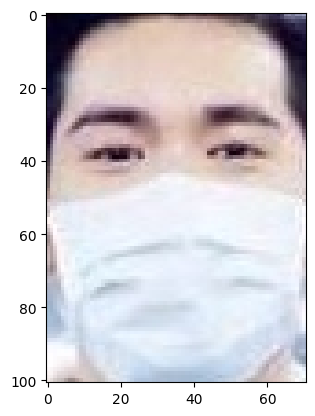

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.56437385 0.36070946]]
The person is wearing a mask


In [58]:
input_image = input("Enter the image path: ")
image = mpimg.imread(input_image)
plt.imshow(image)
plt.show()

input_image = cv2.imread(input_image)

input_image = cv2.resize(input_image , (128 , 128))
input_image_scaled = input_image/255
input_image_reshape = np.reshape(input_image_scaled , [1 , 128 , 128 , 3])

prediction = cnn.predict(input_image_reshape)

print(prediction)

input_label = np.argmax(prediction)

if (input_label == 1):
  print("The person is not wearing a mask")
else:
  print("The person is wearing a mask")

In [59]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [60]:
# load saved model

load_model = load_model('/content/CNN_model.h5')

Enter the image path: /content/data/without_mask/without_mask_1102.jpg


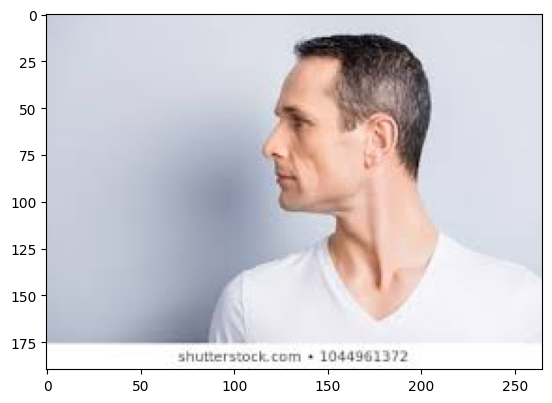

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.46917957 0.496048  ]]
The person is not wearing a mask


In [68]:
input_image = input("Enter the image path: ")
image = mpimg.imread(input_image)
plt.imshow(image)
plt.show()

input_image = cv2.imread(input_image)

input_image = cv2.resize(input_image , (128 , 128))
input_image_scaled = input_image/255
input_image_reshape = np.reshape(input_image_scaled , [1 , 128 , 128 , 3])

prediction = cnn.predict(input_image_reshape)

print(prediction)

input_label = np.argmax(prediction)

if (input_label == 1):
  print("The person is not wearing a mask")
else:
  print("The person is wearing a mask")